In [9]:
from hcve_lib.utils import notebook_init

notebook_init()

import pandas
from matplotlib import pyplot

from deps.data import load_metadata
from deps.logger import logger
from hcve_lib.analysis import missing_values
from hcve_lib.data import format_value, find_item
from hcve_lib.visualisation import display_number, b, p
from hcve_lib.visualisation import histogram
from hcve_lib.visualisation import make_subplots


In [10]:
from deps.data import load_raw_data, load_data

metadata = load_metadata()
data = load_data(metadata)

raw_data = load_raw_data()
raw_data_subset = raw_data.loc[data.index]

In [11]:
remove_missing = ['DEPRESSION', 'BNP', 'LPA', 'FIBRINOGEN', 'HOMOCYST', 'EGFR']

from hcve_lib.formatting import format_percents
from hcve_lib.data import format_identifier

missing = [
    (column, data[column].isna().sum()/len(data[column]))
    for column in data.columns
]
missing = sorted(missing, key=lambda item: item[1], reverse=True)


for column, missing_percent in missing:
    print(f'{format_percents(missing_percent):6} [{column}]: {format_identifier(column, metadata)}')


39.0%  [FNFHF]: Fatal or non-fatal heart failure
39.0%  [FUFNFHF]: FUFNFHF
36.3%  [CI]: Cornell index
35.8%  [SOK]: Sokolow-Lyon index
28.1%  [HAF]: History of atrial fibrillation
24.4%  [QRS]: QRS duration
23.6%  [TRT_LIP]: Intake of lipid-lowering medication
19.6%  [CREA]: Serum creatinine
11.6%  [TRT_ACE]: Intake of angiotensin converting enzyme inhibitors
11.6%  [TRT_CCB]: Intake of calcium channel blockers
11.6%  [TRT_BB]: Intake of beta-blokcers
11.6%  [TRT_ARB]: Intake of angiotensin II receptor blockers
11.6%  [TRT_DIUR]: Intake of diuretics
7.1%   [LDL]: LDL-cholesterol
6.1%   [GLU]: Blood glucose
5.8%   [TG]: Triglycerides
1.6%   [DRK]: Alcohol intake
0.4%   [HR]: Heart rate
0.3%   [BMI]: Body-mass index
0.2%   [BW]: Body weight
0.2%   [HPAD]: History of peripheral artery disease
0.2%   [SMK]: Smoking status
0.2%   [BH]: Body height
0.2%   [HCV]: History of cardiovascular disease
0.2%   [HDL]: HDL-cholesterol
0.2%   [CHOL]: Total cholesterol
0.1%   [HCAD]: History of coronary

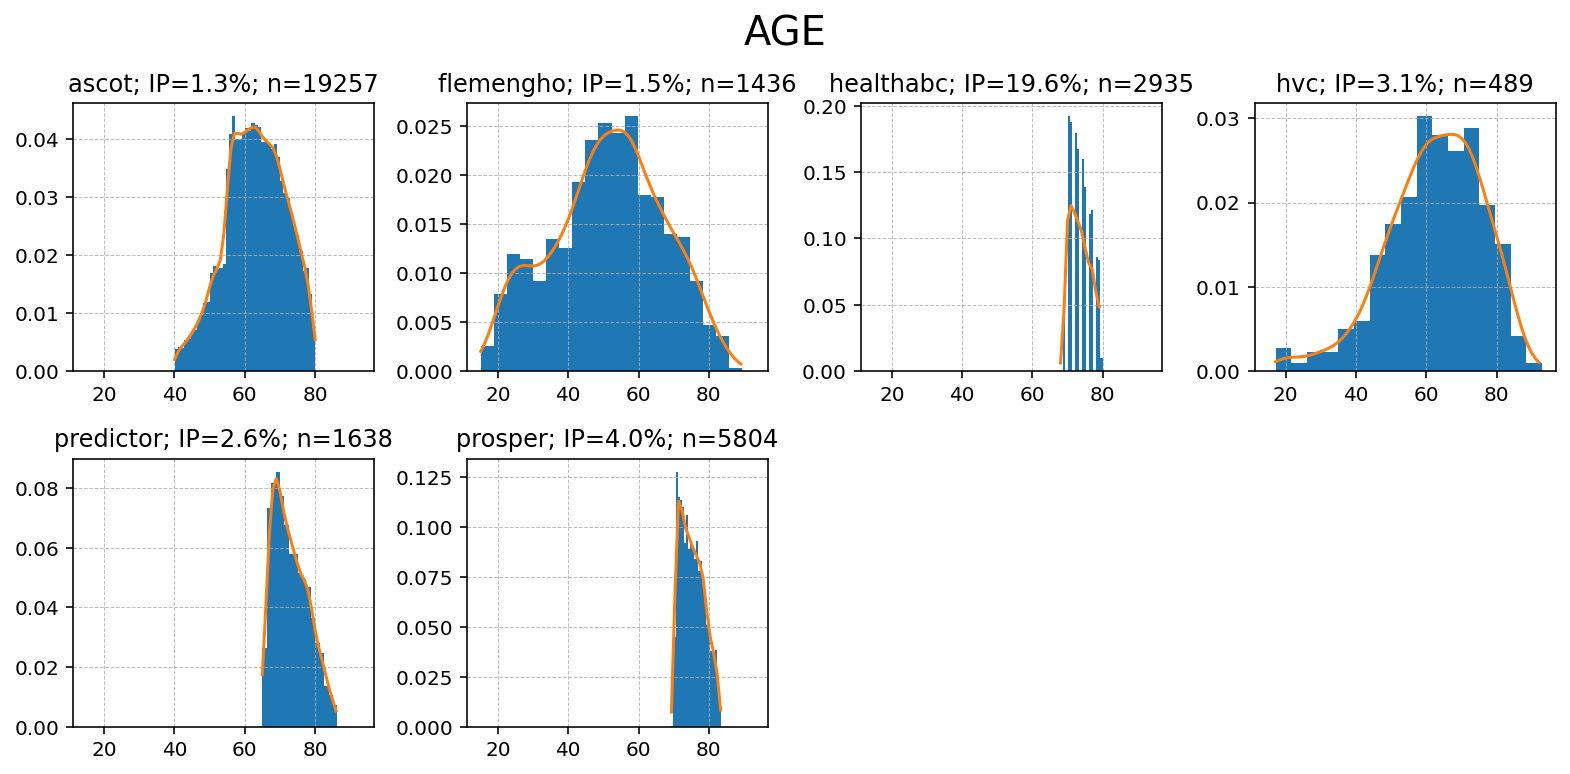

In [12]:
from hcve_lib.visualisation import savefig

cohorts = data.groupby('STUDY_NUM')
axes, fig = make_subplots(len(cohorts), columns=4, sharex=True, width=11)
fig.suptitle('AGE', fontsize=20, y=0.97)
for ax, (study_num, cohort) in zip(axes, cohorts):
    ax.set_title(f'{format_value(study_num, find_item("STUDY_NUM", metadata))}; IP={format_percents(len(cohort["NFHF"][cohort["NFHF"] == 1]) / len(cohort))}; n={len(cohort)}')
    histogram(cohort['AGE'], ax=ax)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.set_xlabel(None)
    ax.plot()
pyplot.tight_layout()
savefig('./output/data_distribution.svg')
pyplot.show()

In [13]:

b('Input rows')
display_number(len(data))

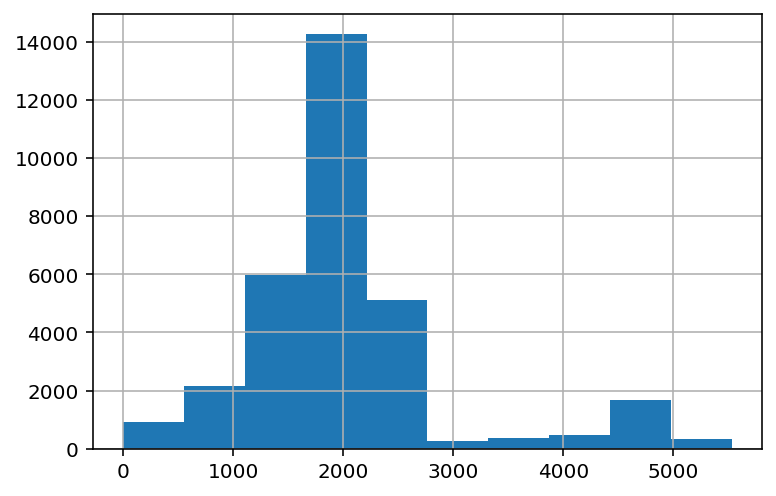

In [14]:
b('Cardiovascular death FU histogram')

data['FUFCV'].hist()
pyplot.show()


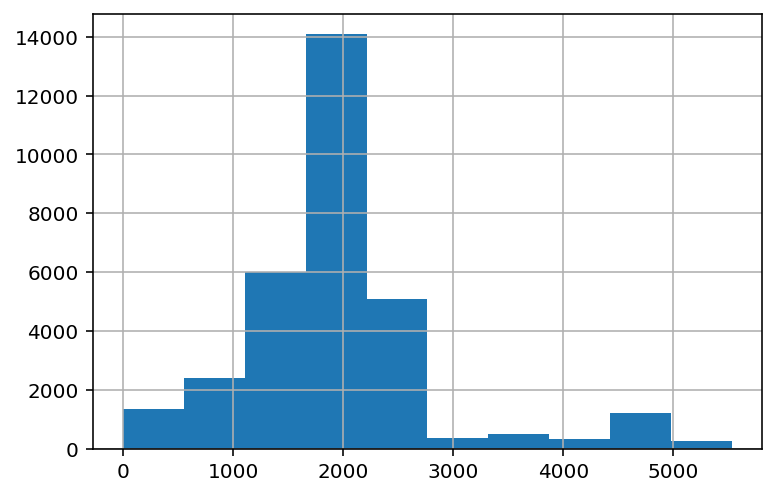

In [15]:
b('Non-fatal heart failure FU histogram')
data['FUNFHF'].hist();


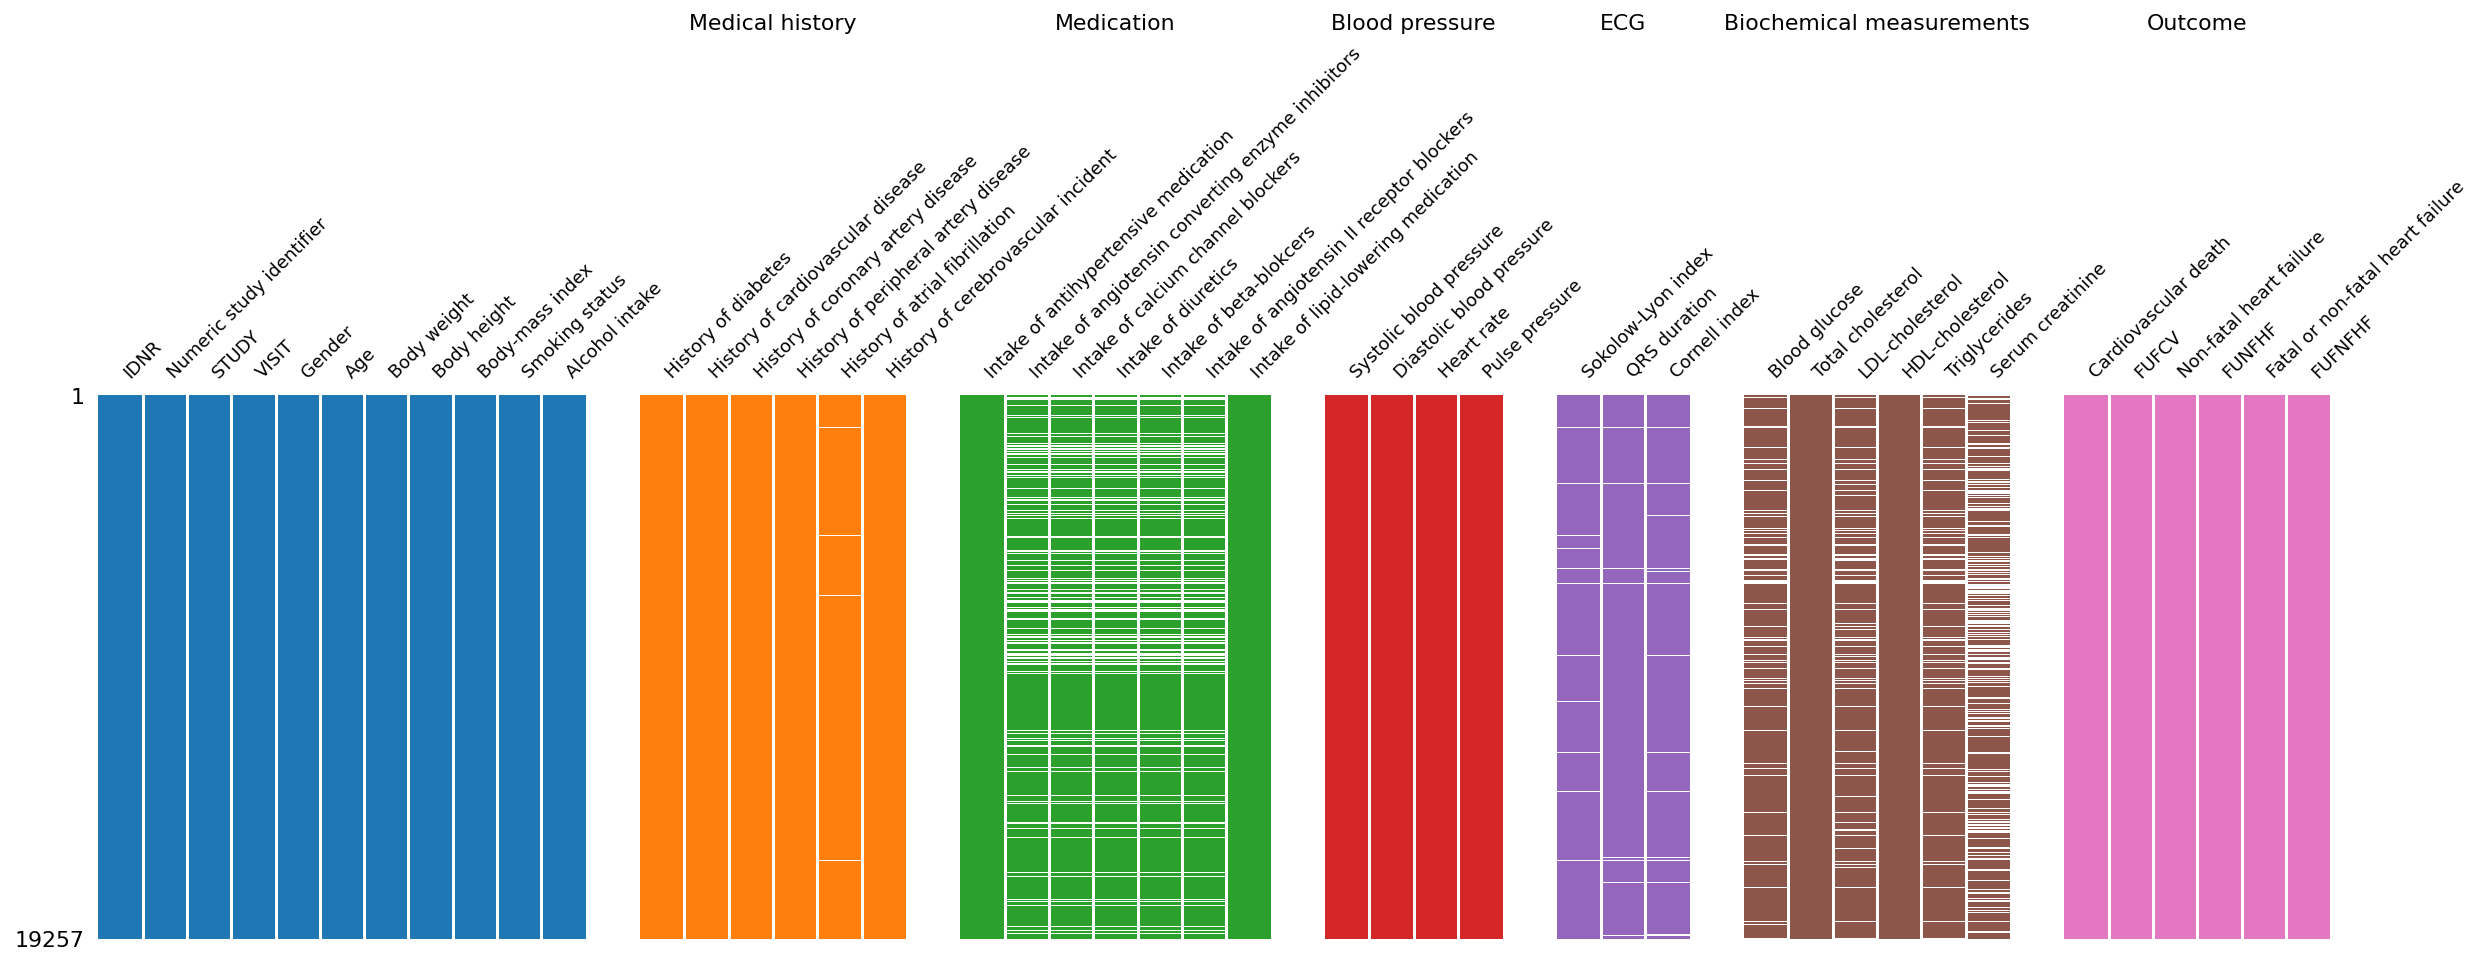

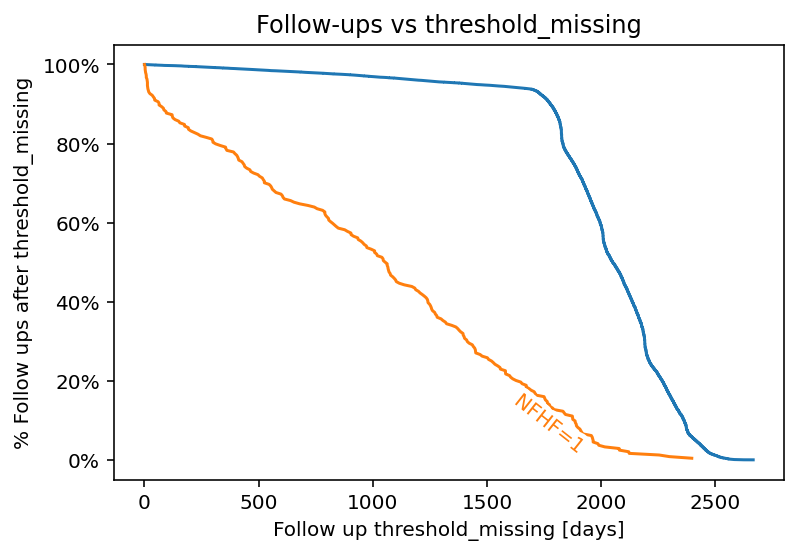

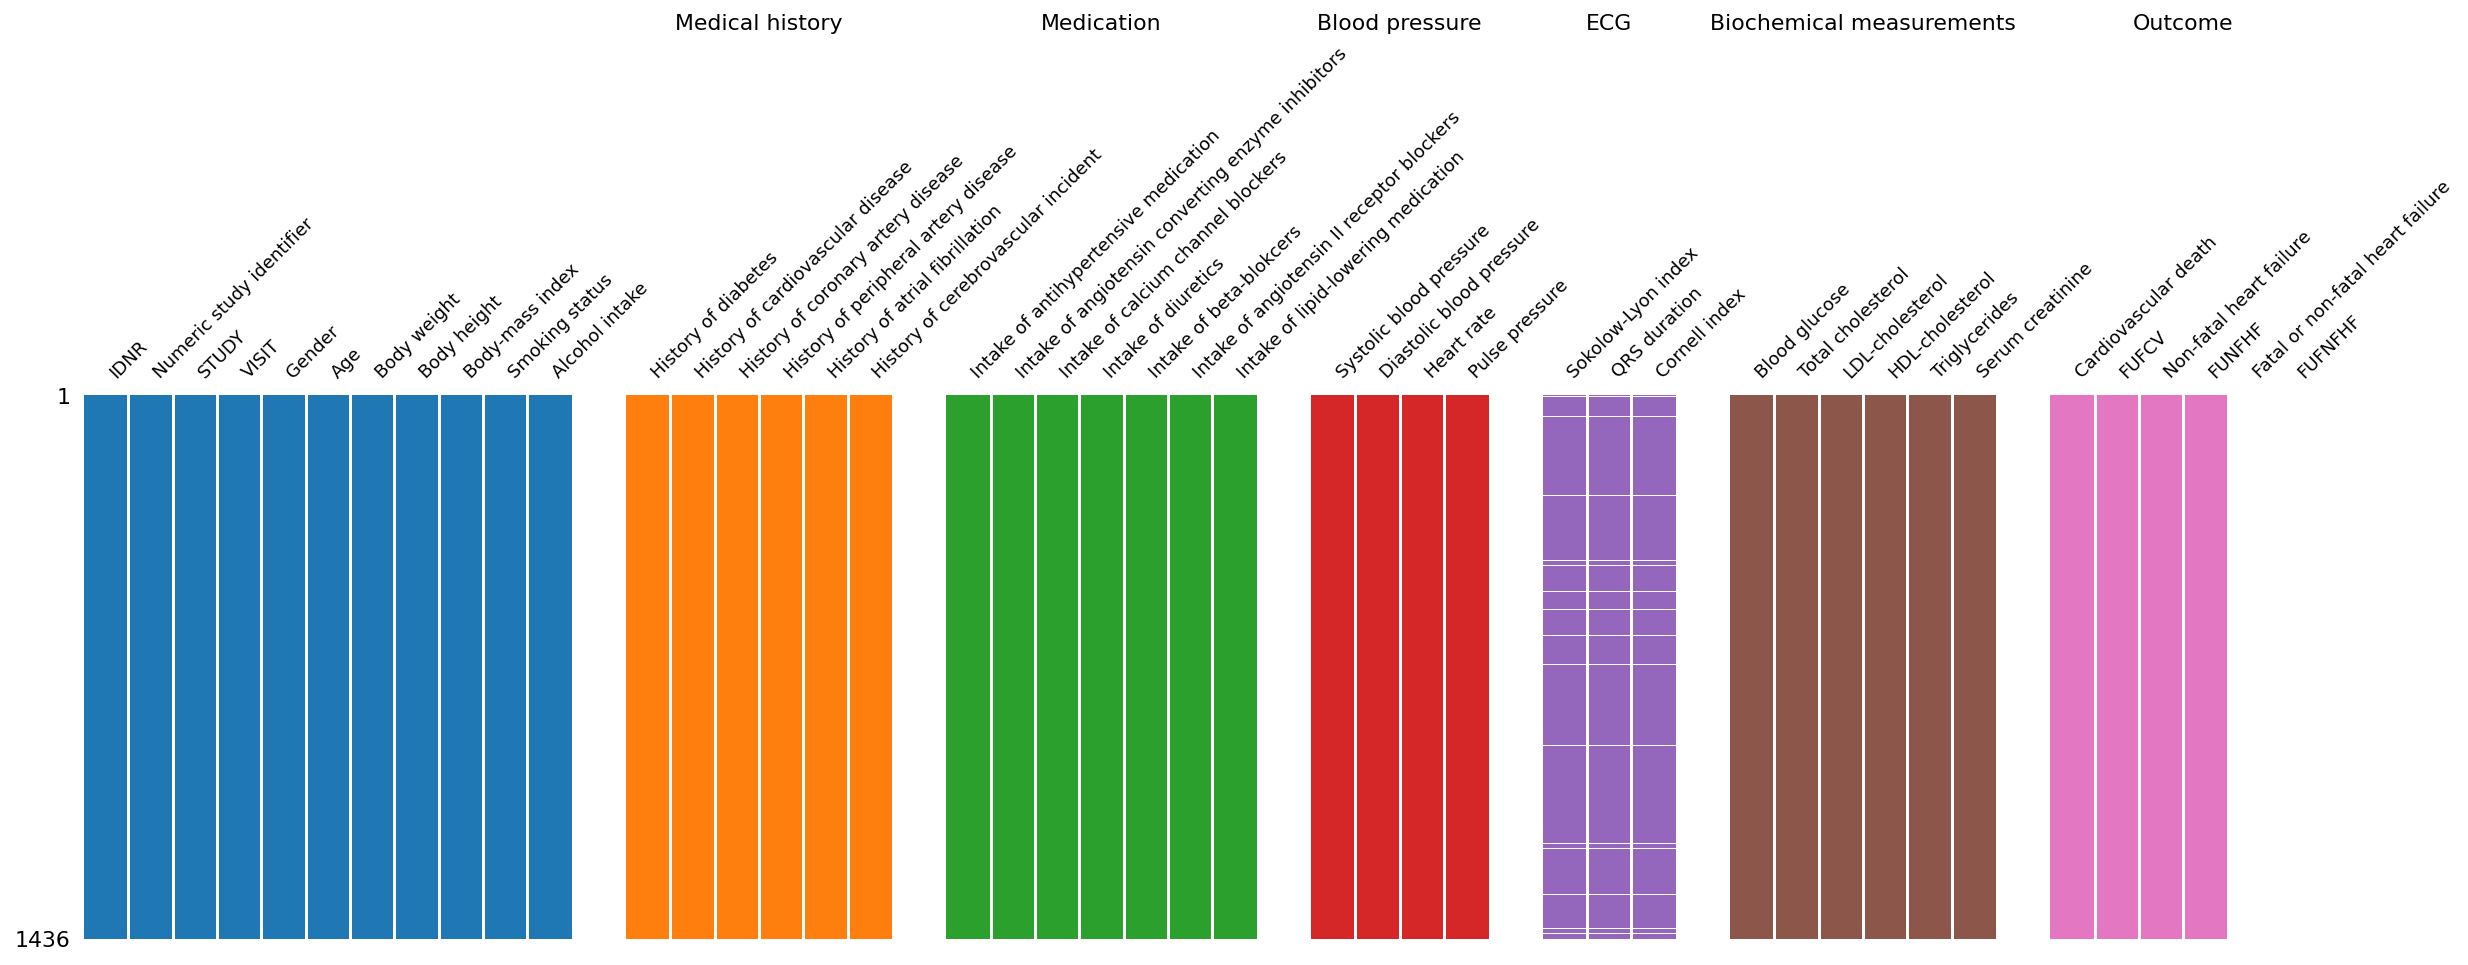

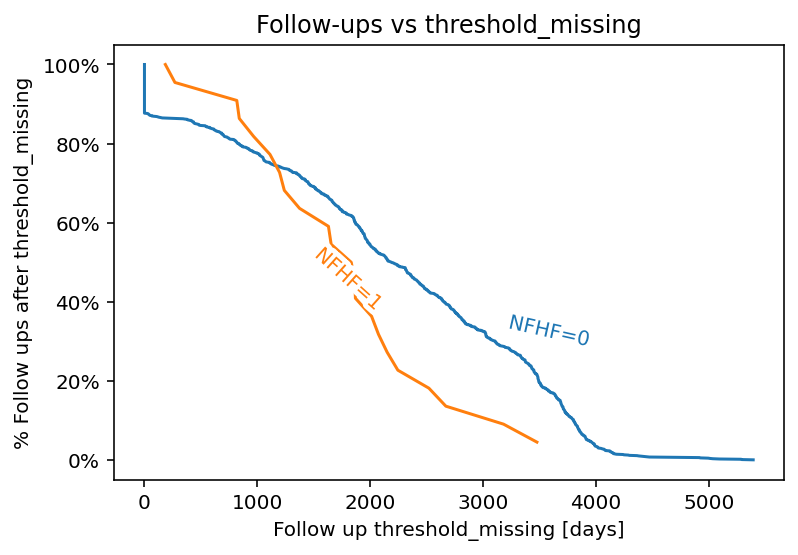

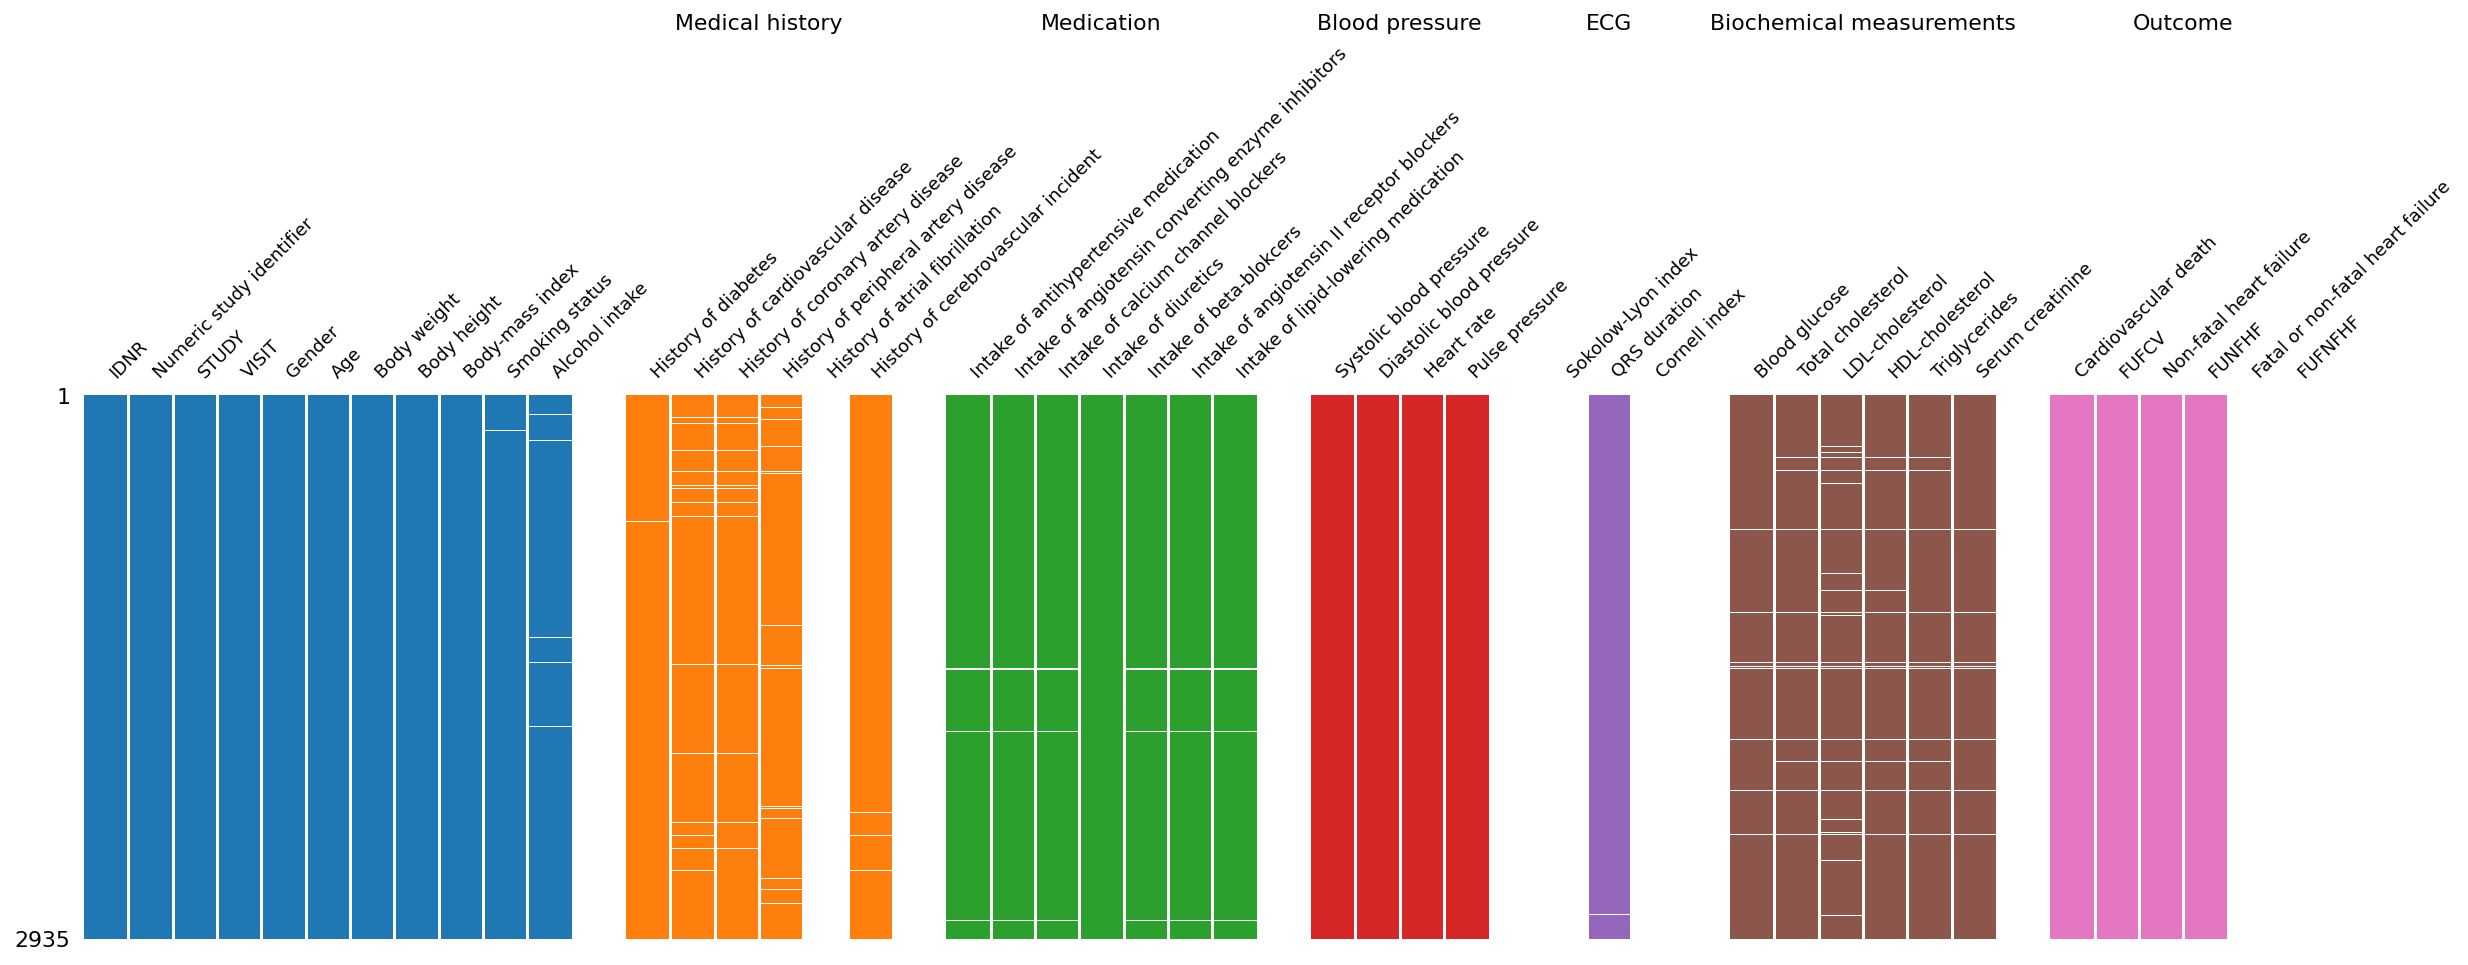

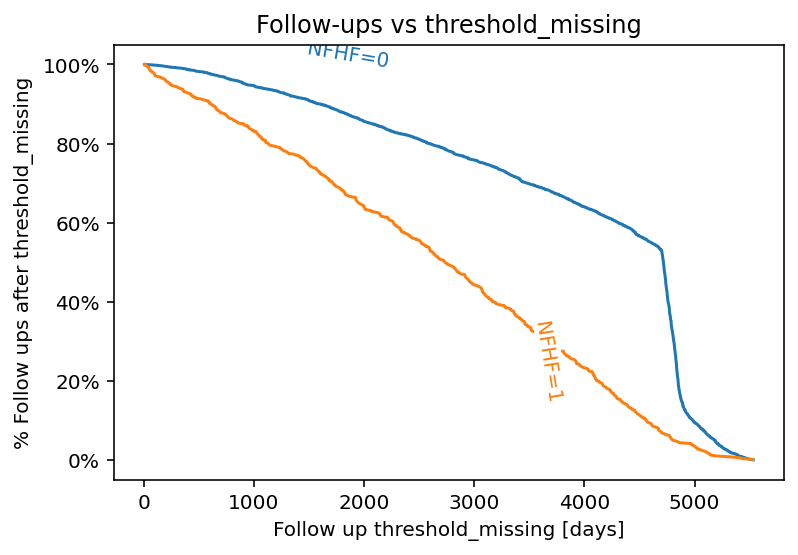

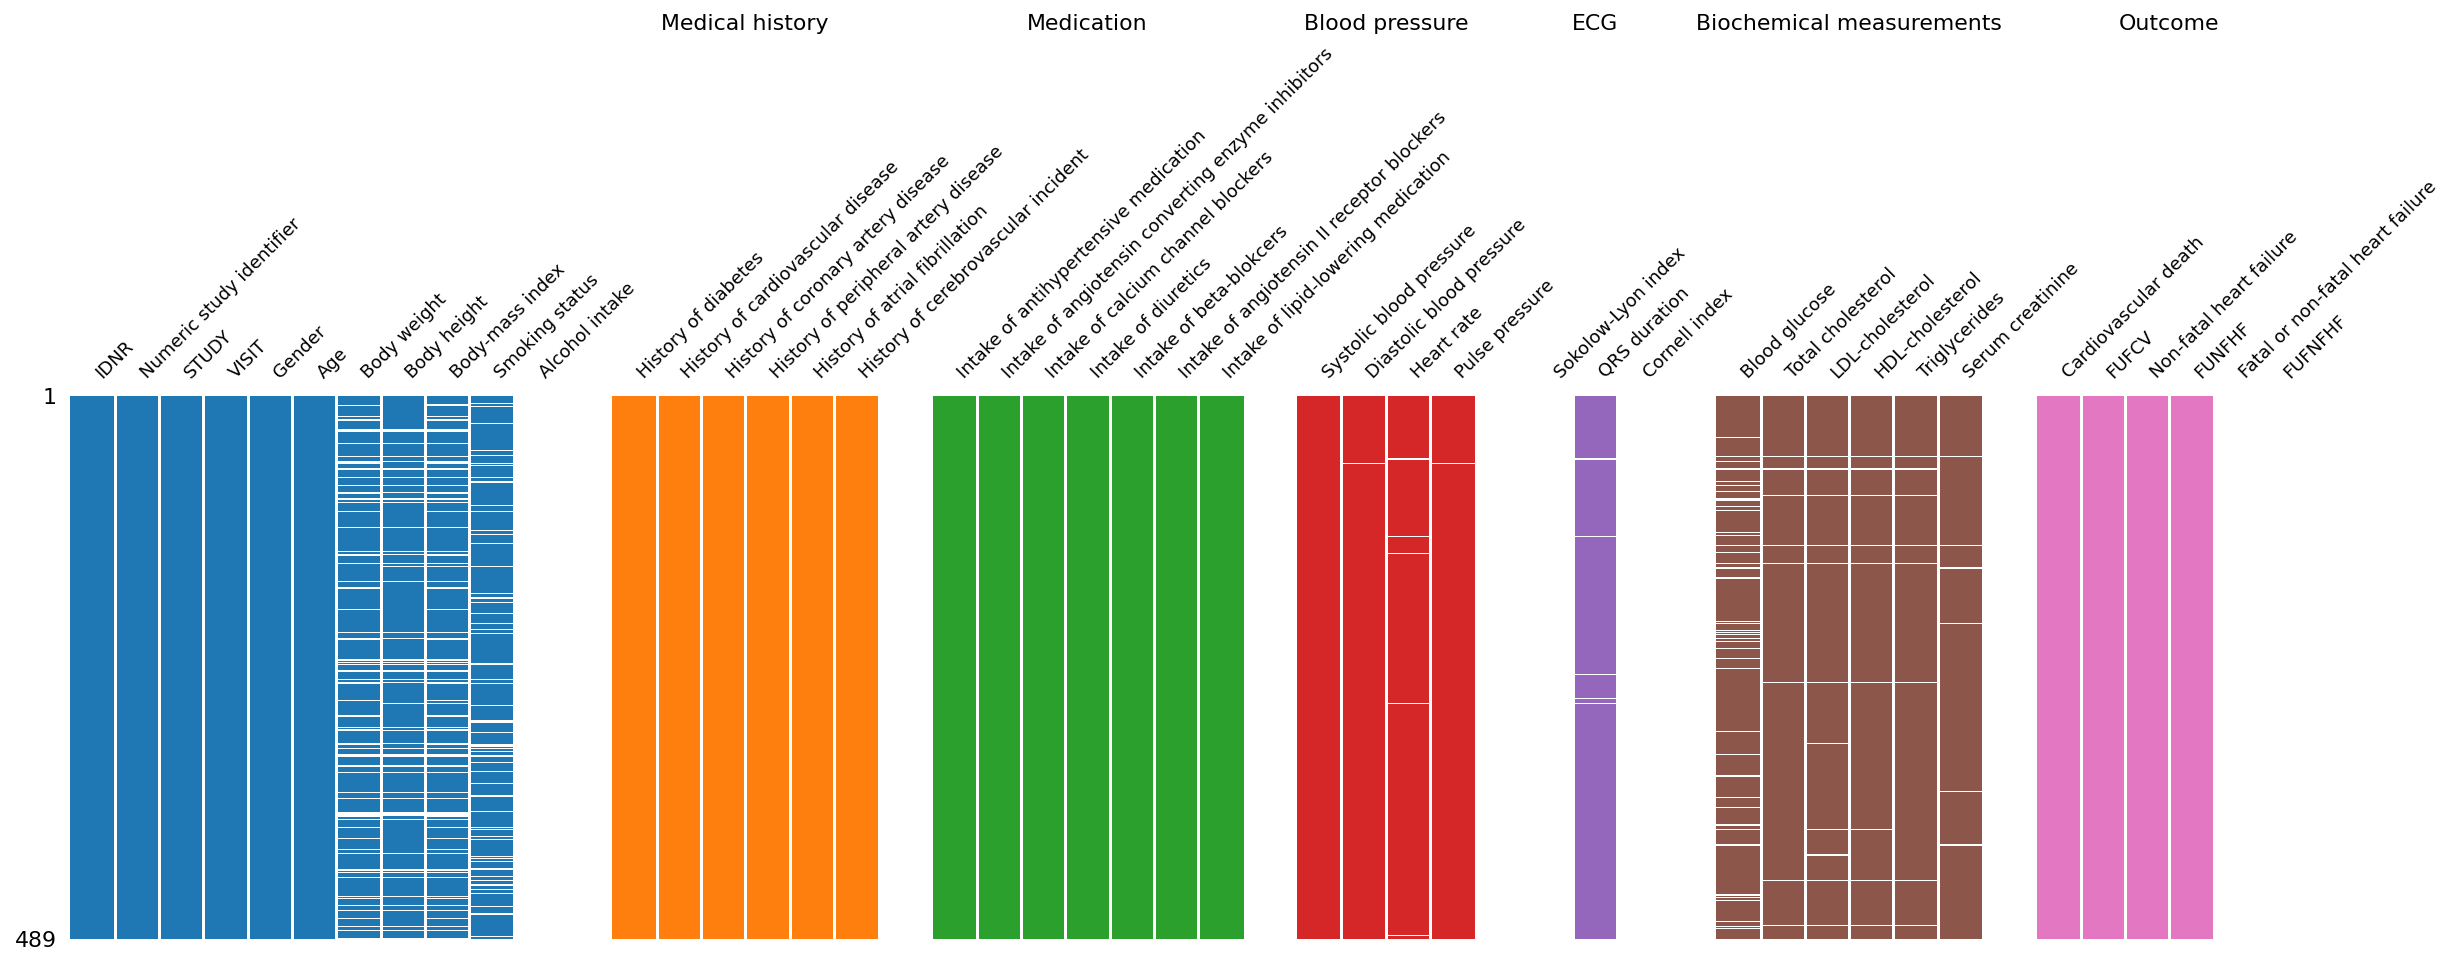

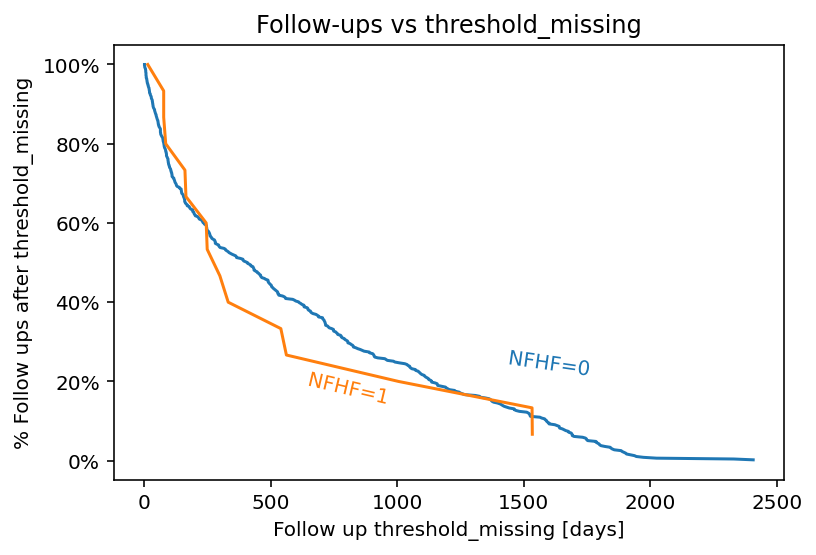

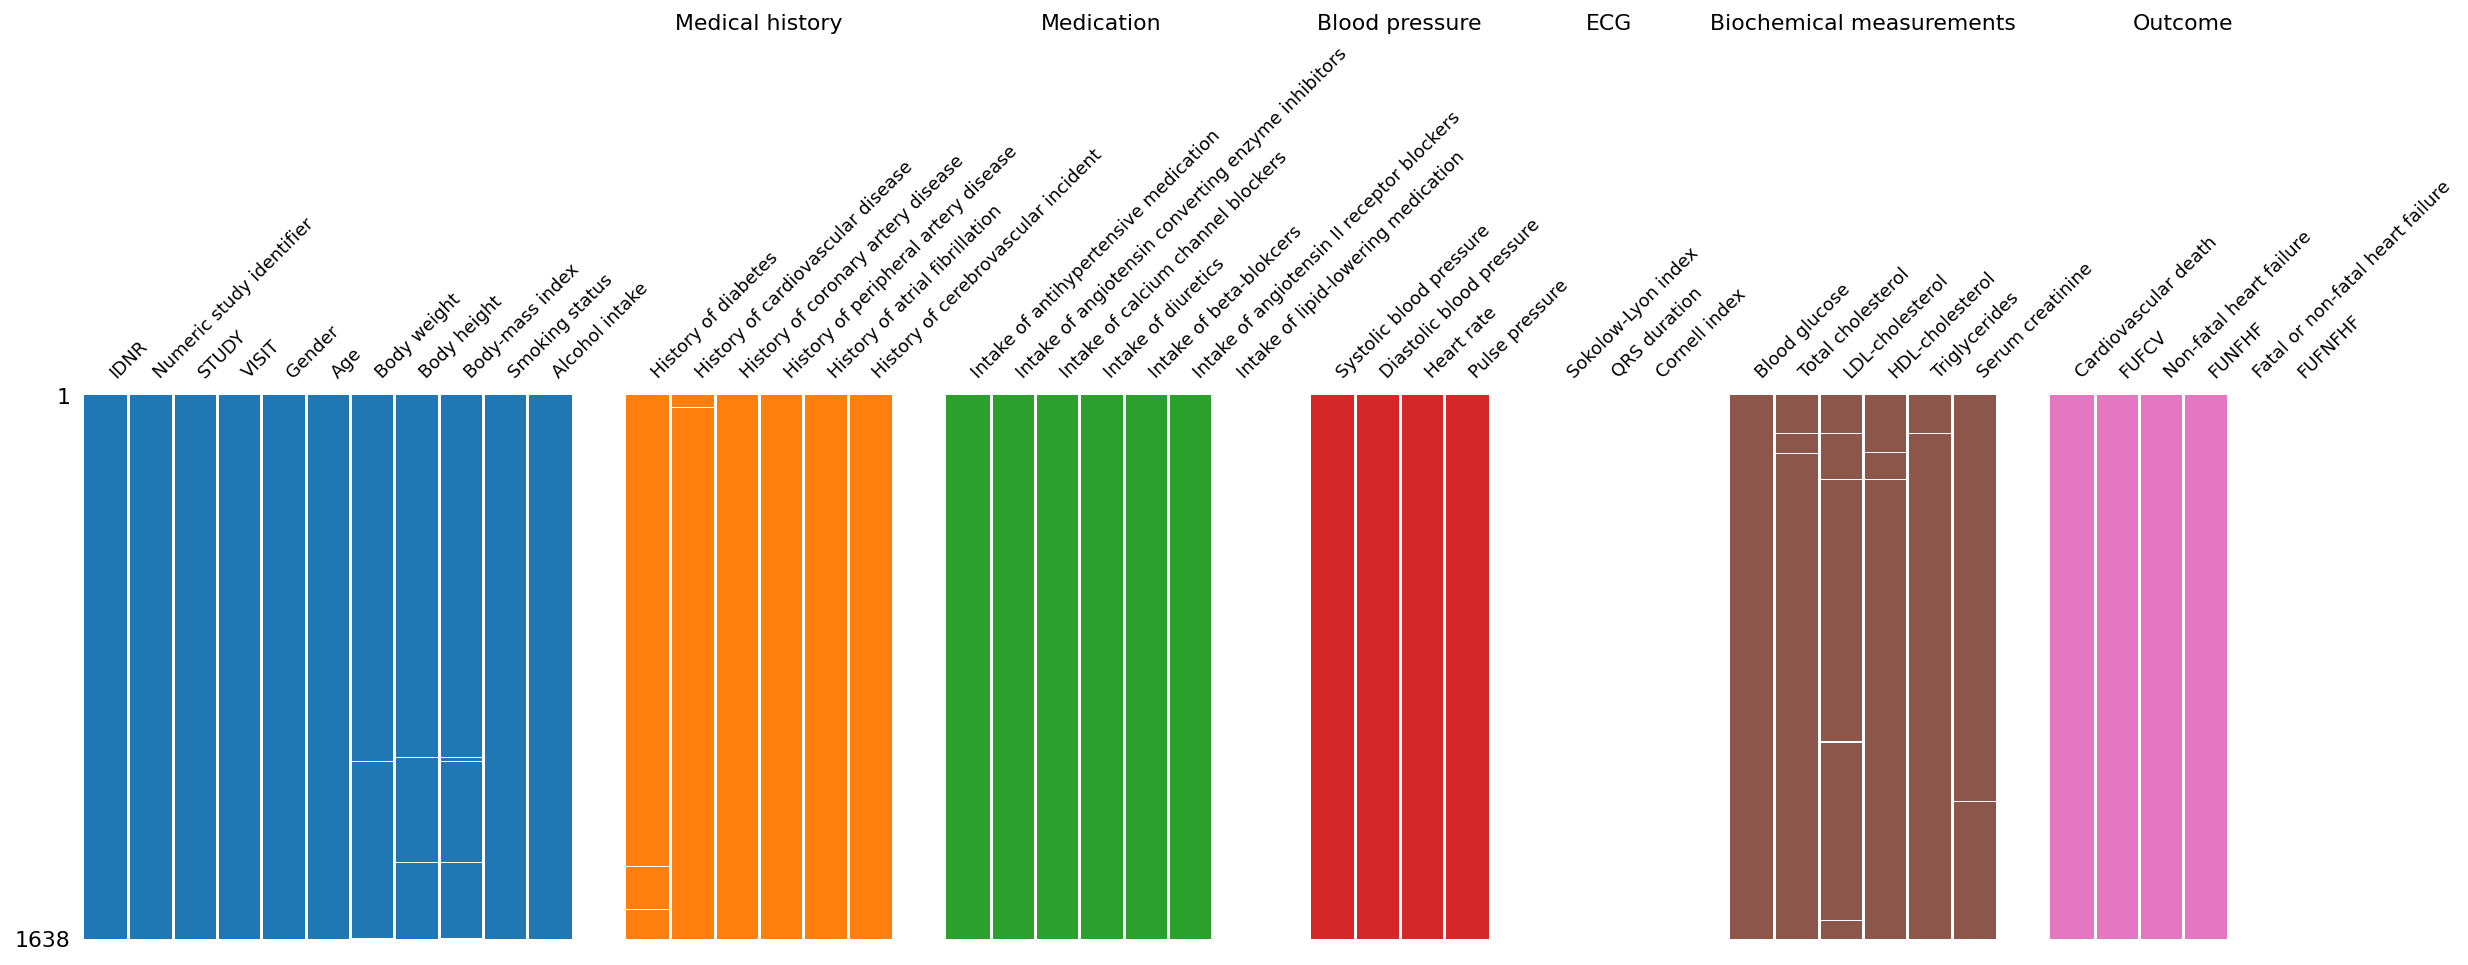

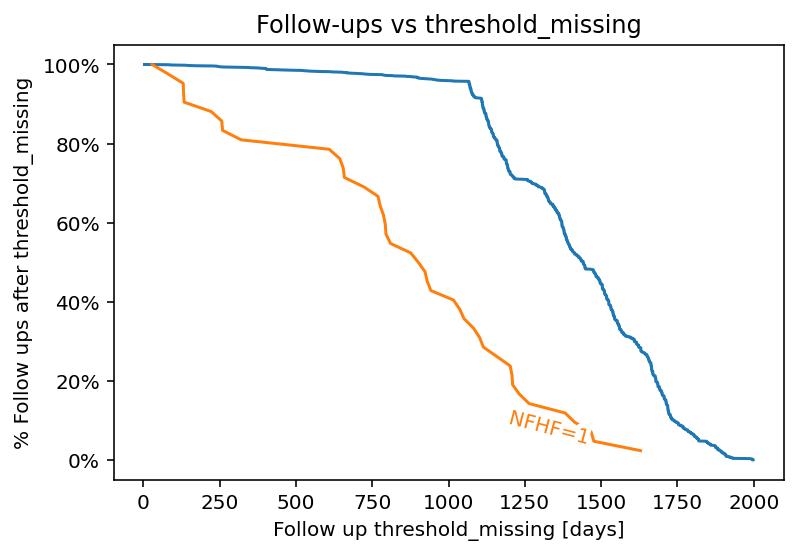

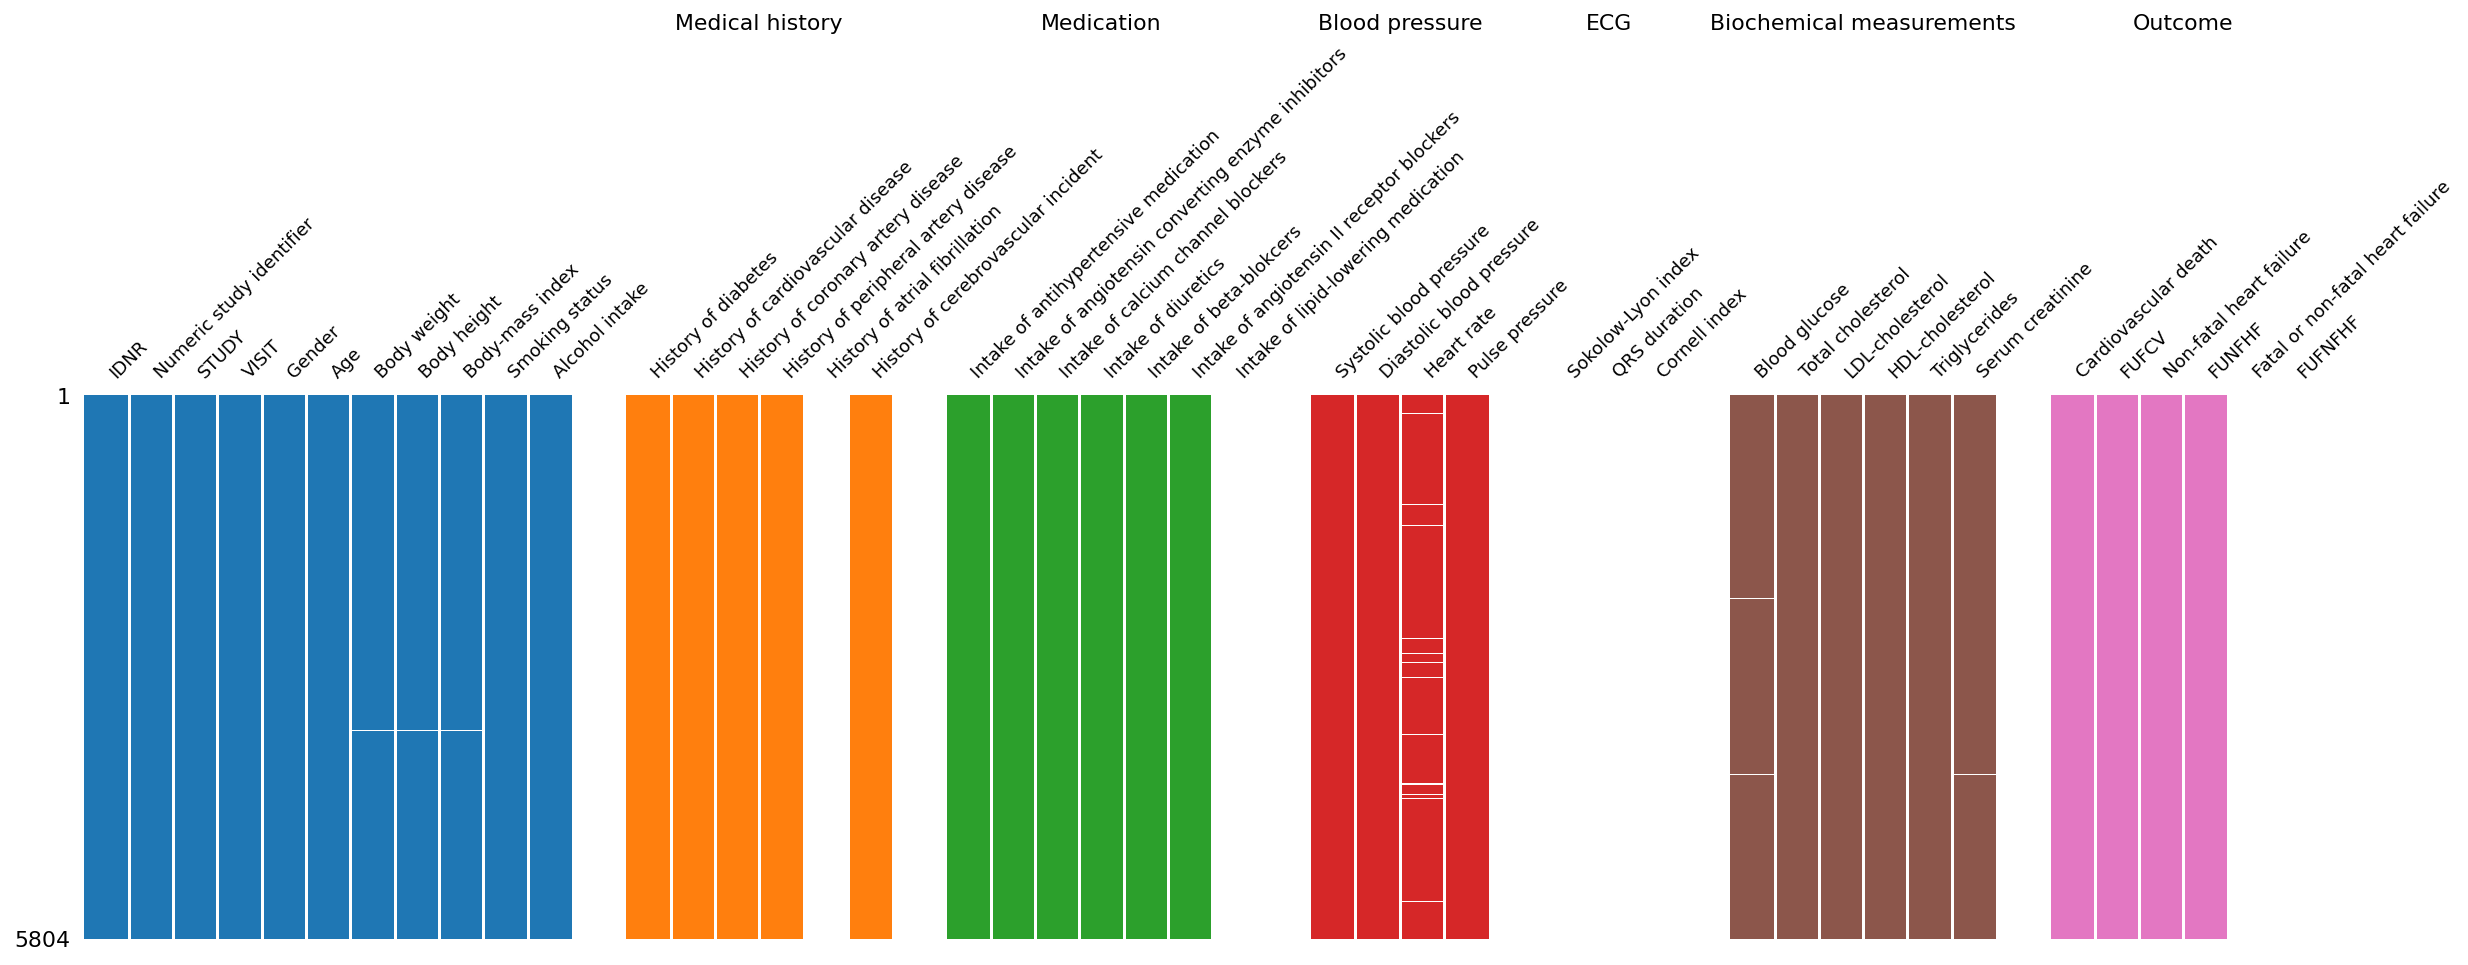

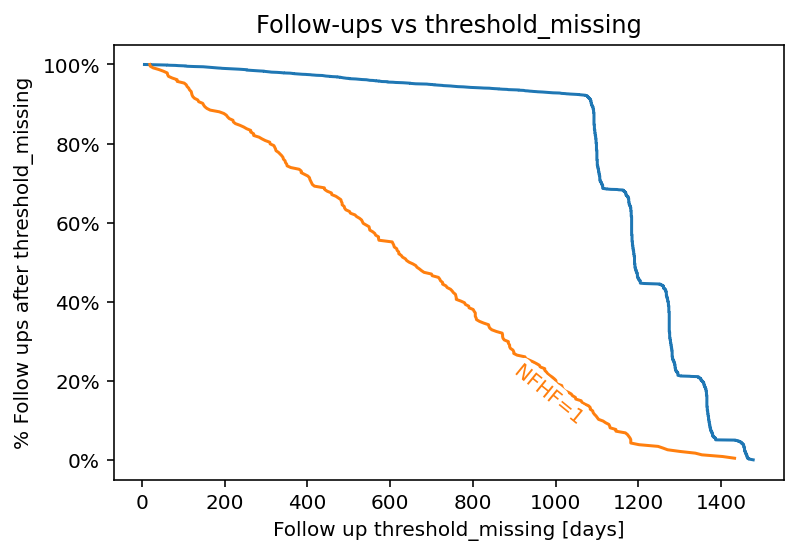

In [16]:
from hcve_lib.visualisation import h2
from labellines import labelLines
from hcve_lib.analysis import follow_ups_vs_threshold

for study_num, cohort in data.groupby('STUDY_NUM'):
    h2(f'{format_value(study_num, find_item("STUDY_NUM", metadata))} (n={len(cohort)})')
    missing_values(
        cohort,
        metadata,
    )
    pyplot.show()

    follow_ups_vs_threshold(cohort[cohort['NFHF'] == 0]['FUNFHF'], label='NFHF=0')
    follow_ups_vs_threshold(cohort[cohort['NFHF'] == 1]['FUNFHF'], label='NFHF=1')
    labelLines(pyplot.gca().get_lines(), zorder=2.5, yoffsets=[0.15, -0.05])
    pyplot.show()
    p(f'NFHF: IP={format_percents(len(cohort["NFHF"][cohort["NFHF"] == 1]) / len(cohort))}; n={len(cohort["NFHF"][cohort["NFHF"] == 1])}')
    p(f'FCV: IP={format_percents(len(cohort["FCV"][cohort["FCV"] == 1]) / len(cohort))}; n={len(cohort["FCV"][cohort["FCV"] == 1])}')
    print()

